In [1]:
from googletrans import Translator
import easyocr
from gtts import gTTS
from IPython.display import Audio
import wget

In [2]:
wget.download('https://i.stack.imgur.com/mk1jX.jpg')

'mk1jX.jpg'

In [3]:
reader = easyocr.Reader(['ta'])
translator = Translator()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


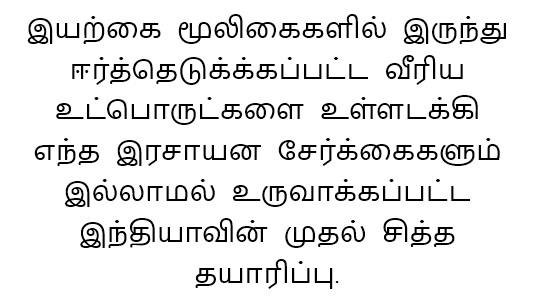

In [4]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open('mk1jX.jpg')
im

In [5]:
bounds = reader.readtext('mk1jX.jpg',add_margin = 0.55, width_ths= 0.7, link_threshold = 0.8,decoder = 'beamsearch',blocklist = '=-')
bounds

[([[32, 0], [532, 0], [532, 70], [32, 70]],
  'இயற்கை மூலிகைகளில் இருந்து',
  0.18822886049747467),
 ([[49, 29], [489, 29], [489, 110], [49, 110]],
  'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
  0.03260150924324989),
 ([[38, 77], [324, 77], [324, 146], [38, 146]],
  'உட்பொருட்களை ',
  0.18305952847003937),
 ([[304, 78], [496, 78], [496, 140], [304, 140]],
  'உள்ளடக்கி',
  0.45306169986724854),
 ([[14, 118], [523, 118], [523, 188], [14, 188]],
  'எந்த இரசாயன சேர்க்கைகளும்',
  0.05448572337627411),
 ([[71, 156], [491, 156], [491, 229], [71, 229]],
  'இல்லாமல் உருவாக்கப்பட்ட',
  0.6472389698028564),
 ([[60, 195], [478, 195], [478, 272], [60, 272]],
  'இந்தியாவின் முதல் சித்த',
  0.4297117590904236),
 ([[174, 237], [359, 237], [359, 303], [174, 303]],
  'தயாரிப்பு',
  0.15375231206417084)]

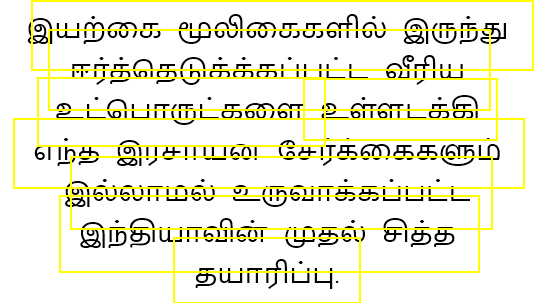

In [6]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0],fill=color,width=width)
    return image
    
draw_boxes(im, bounds)

In [7]:
text_list = reader.readtext('mk1jX.jpg',add_margin = 0.55, width_ths= 0.7, link_threshold = 0.8,decoder = 'beamsearch',blocklist = '=-',detail = 0)
text_list

['இயற்கை மூலிகைகளில் இருந்து',
 'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
 'உட்பொருட்களை ',
 'உள்ளடக்கி',
 'எந்த இரசாயன சேர்க்கைகளும்',
 'இல்லாமல் உருவாக்கப்பட்ட',
 'இந்தியாவின் முதல் சித்த',
 'தயாரிப்பு']

In [8]:
text_comb = ' '.join(text_list)
text_comb

'இயற்கை மூலிகைகளில் இருந்து ஈர்த்தெடுக்க்கப்பட்ட வீரிய உட்பொருட்களை  உள்ளடக்கி எந்த இரசாயன சேர்க்கைகளும் இல்லாமல் உருவாக்கப்பட்ட இந்தியாவின் முதல் சித்த தயாரிப்பு'

In [9]:
print(translator.detect(text_comb))

Detected(lang=ta, confidence=1.0)


In [10]:
text_en = translator.translate(text_comb,src = 'ta')
print(text_en.text)

India's first paranormal product made without any chemical additives containing active ingredients extracted from natural herbs


In [16]:
ta_tts = gTTS(text_comb,lang='ta')
ta_tts.save('trans.mp3')
Audio('trans.mp3',autoplay=True)

In [18]:
text_hi = translator.translate(text_comb,src = 'ta',dest = 'fr')
print(text_hi.text)

Le premier produit paranormal de l'Inde fabriqué sans aucun additif chimique contenant des ingrédients actifs extraits d'herbes naturelles


In [20]:
ta_tts_hi = gTTS(text_hi.text,lang ='fr')
ta_tts_hi.save('trans_hi.mp3')
Audio('trans_hi.mp3',autoplay=True)